__Hierarchical clustering__ groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level. This allows you to decide the level or scale of clustering that is most appropriate for your application.

__K-means clustering__ is a partitioning method. The data is partitioned into k mutually exclusive clusters and returns the index of the cluster to which it has assigned each observation. Unlike hierarchical clustering, k-means clustering operates on actual observations (rather than the larger set of dissimilarity measures) and creates a single level of clusters. The distinctions mean that k-means clustering is often more suitable than hierarchical clustering for large amounts of data. k-means treats each observation in your data as an object having a location in space. It finds a partition in which objects within each cluster are as close to each other as possible and as far from objects in other clusters as possible

__Gaussian mixture models__ assign each observation to a cluster by maximizing the posterior probability that the data point belongs to its assigned cluster.

In machine learning, __lazy learning__ is a learning method in which generalization beyond the training data is delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries.

The main advantage gained in employing a lazy learning method, such as case-based reasoning, is that the target function will be approximated locally, __such as in the k-nearest neighbor__ algorithm. Because the target function is approximated locally for each query to the system, lazy learning systems can simultaneously solve multiple problems and deal successfully with changes in the problem domain.

The disadvantages with lazy learning include the large space requirement to store the entire training dataset. Particularly noisy training data increases the case base unnecessarily, because no abstraction is made during the training phase. Another disadvantage is that lazy learning methods are usually slower to evaluate, though this is coupled with a faster training phase.

__Lazy classifiers are most useful for large datasets with few attributes__.

__Fuzzy c-means (FCM)__ is a data-clustering technique wherein each data point belongs to a cluster to some degree that is specified by a membership grade. FCM allows one piece of data to belong to two or more clusters.

__Self Organizing Maps__ Dimensional reduction when we have non-normal distributions. At each stage of representation, or processing, each piece of incoming information is kept in its proper context/neighborhood.

Topology is a mathematical discipline that studies shape. __Topological data analysis (TDA)__ refers to the adaptation of this discipline to analyzing highly complex data. It draws on the philosophy that all data have an underlying shape and that shape has meaning.

The analysis creates a summary or compressed representation of all of the data points to help rapidly uncover critical patterns and relationships in data. By identifying the geometric relationships that exist between data points, TDA offers an extremely simple way of interrogating data to understand the underlying properties that characterize the segments and subsegments that lie within data.

From Wikipedia, the free encyclopedia  

In machine learning, __hyperparameter__ optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data.[1] The objective function takes a tuple of hyperparameters and returns the associated loss.[1] Cross-validation is often used to estimate this generalization performance.[2]

__Import Packages__

In [1]:
import numpy as np
from itertools import product
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from IPython.display import Image
import matplotlib.pyplot as plt

__Create Data__

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
n_folds = 5
data = (x, y, n_folds) #creates a tuple; a tuple is same as list but immutable (Cant be changed)

__Due before live class 2__
1. Write a function to take a list or dictionary of clfs and hypers ie use logistic regression, each with 3 different sets of hyper parrameters for each

In [ ]:
def run(a_Classifier, data, Classifier_hyper={}):
    x, y, n_folds = data  # unpack data containter
    kf = KFold(n_splits=n_folds) # Establish the cross validation
    ret = {} # classic explicaiton of results as dictionary
    for ids, (train_index, test_index) in enumerate(kf.split(x, y)):

        Classifier = a_Classifier(**Classifier_hyper) # unpack paramters into clf is they exist
        Classifier.fit(x[train_index], y[train_index])
        pred = Classifier.predict(x[test_index])
        ret[ids]= {'Classifier': Classifier,
               'accuracy': accuracy_score(y[test_index], pred)},
        return ret

algorithmlist = [RandomForestClassifier,LogisticRegression]
for algorithms in algorithmlist:
    results = run(algorithms, data, Classifier_hyper={})
    print(results)

__Due before live class 3__
2. expand to include larger number of classifiers and hyperparmater settings
3. find some simple data
4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings

__EXAMPLES__

https://stackoverflow.com/questions/41901344/iterating-through-functions-and-outputting-results-in-organized-pandas-dataframe

In [ ]:
##############################EXAMPLE#################################
x, y, n_folds = data
kf = KFold(n_splits=n_folds)
print(kf)

In [ ]:
##############################EXAMPLE#################################
for ids, (train_index, test_index) in enumerate(kf.split(x, y)):
    print("k fold = ", ids)
    print("            train indexes", train_index)
    print("            test indexes", test_index)

In [ ]:
##############################EXAMPLE#################################
def run(a_clf, data, clf_hyper={}):
    M, L, n_folds = data #EDIT: unpack the "data" container of arrays
    kf = KFold(n_splits=n_folds) # JS: Establish the cross validation
    ret = {} # JS: classic explicaiton of results
    for ids, (train_index, test_index) in enumerate(kf.split(M, L)): #EDIT: We're interating through train and test indexes by using kf.split
                                                                   #      from M and L.
                                                                   #      We're simply splitting rows into train and test rows
                                                                   #      for our five folds.
        clf = a_clf(**clf_hyper) # JS: unpack paramters into clf if they exist   #EDIT: this gives all keyword arguments except 
                                                                             #      for those corresponding to a formal parameter
                                                                             #      in a dictionary.
        clf.fit(M[train_index], L[train_index])   #EDIT: First param, M when subset by "train_index", 
                                              #      includes training X's. 
                                              #      Second param, L when subset by "train_index",
                                              #      includes training Y.                             
        pred = clf.predict(M[test_index])         #EDIT: Using M -our X's- subset by the test_indexes, 
                                              #      predict the Y's for the test rows.
        ret[ids]= {'clf': clf,                    #EDIT: Create arrays of
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
        return ret

#Use run function
results = run(RandomForestClassifier, data, clf_hyper={})

print(results)

In [3]:
##############################EXAMPLE#################################
"""
Created on Sat Jan 12 11:56:07 2019

@author: Chris
"""
import numpy as np
#from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold  #EDIT: I had to import KFold 
#EDIT: array M includes the X's
M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.random.choice([0,1], size=(M.shape[0],), p=[1./3, 2./3])
n_folds = 5
#EDIT: pack the arrays together into "data"
data = (M,L,n_folds)

# With changes to hyper params
simpleHyperDict = {"min_samples_split": 3, "n_jobs": 2}
clf = RandomForestClassifier(**simpleHyperDict)
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [ ]:
##############################THOROUGH EXAMPLE#################################
"""
Created on Sat Jan 12 13:18:32 2019
@author: Chris
"""
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #EDIT: I had to import KFold 

M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.random.choice([0,1], size=(M.shape[0],), p=[1./3, 2./3])
n_folds = 5
data = (M,L,n_folds)
M, L, n_folds = data
kf = KFold(n_splits=n_folds)

#EDIT: A function, "run", to run all our classifiers against our data.

def run(a_clf, data, clf_hyper={}):
  M, L, n_folds = data #EDIT: unpack the "data" container of arrays
  kf = KFold(n_splits=n_folds) # JS: Establish the cross validation 
  ret = {} # JS: classic explicaiton of results
  
  for ids, (train_index, test_index) in enumerate(kf.split(M, L)): #EDIT: We're interating through train and test indexes by using kf.split
                                                                   #      from M and L.
                                                                   #      We're simply splitting rows into train and test rows
                                                                   #      for our five folds.
    
    clf = a_clf(**clf_hyper) # JS: unpack paramters into clf if they exist   #EDIT: this gives all keyword arguments except 
                                                                             #      for those corresponding to a formal parameter
                                                                             #      in a dictionary.
            
    clf.fit(M[train_index], L[train_index])   #EDIT: First param, M when subset by "train_index", 
                                              #      includes training X's. 
                                              #      Second param, L when subset by "train_index",
                                              #      includes training Y.                             
    
    pred = clf.predict(M[test_index])         #EDIT: Using M -our X's- subset by the test_indexes, 
                                              #      predict the Y's for the test rows.
    
    ret[ids]= {'clf': clf,                    #EDIT: Create arrays of
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}    
  return ret

#Use run function with a list and a for loop
clfsList = [RandomForestClassifier, LogisticRegression] 

for clfs in clfsList:
    results = run(clfs, data, clf_hyper={})
    print(results)

In [5]:
##############################EXAMPLE#################################
"""
@author: Chris
"""
#import numpy as np
#from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import KFold  #EDIT: I had to import KFold 

clfsList = [RandomForestClassifier, LogisticRegression] 
clfDict = {'RandomForestClassifier': {"min_samples_split": [2,3,4]}, 'LogisticRegression': {"tol": [0.001,0.01,0.1]}}

def myClfHypers(clfsList):
    for clf in clfsList:
    #I need to check if values in clfsList are in clfDict
        clfString = str(clf)
        print("clf: ", clfString)
        for k1, v1 in clfDict.items():  # go through first level of clfDict
            if k1 in clfString:		# if clfString1 matches first level
                for k2,v2 in v1.items(): # go through the inner dictionary of hyper parameters
                    print(k2)			 # for each hyper parameter in the inner list..	
                    for vals in v2:		 # go through the values for each hyper parameter 
                        print(vals)		 # and show them...
myClfHypers(clfsList)

clf:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
min_samples_split
2
3
4
clf:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
tol
0.001
0.01
0.1


In [6]:
##############################EXAMPLE#################################
"""
@author: Chris
"""
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #EDIT: I had to import KFold 
 
#EDIT: array M includes the X's
M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])

#EDIT: array L includes the Y's, they're all ones and as such is only for example (an ML algorithm would always predict 1).
#L = np.ones(M.shape[0])

#So, I gave us some 0's too for Logistic Regression
L = np.random.choice([0,1], size=(M.shape[0],), p=[1./3, 2./3])
#EDIT: a single value, 5, to use for 5-fold (k-fold) cross validation
n_folds = 5

#EDIT: pack the arrays together into "data"
data = (M,L,n_folds)

#EDIT: Let's see what we have.
print(data)

# data expanded
M, L, n_folds = data
kf = KFold(n_splits=n_folds)

print(kf)

# define the run function
def run(a_clf, data, clf_hyper={}):
  M, L, n_folds = data #EDIT: unpack the "data" container of arrays
  kf = KFold(n_splits=n_folds) # JS: Establish the cross validation 
  ret = {} # JS: classic explicaiton of results
  
  for clfs in a_clf: 
      print(ret) # show this to explain that we have a BUG!
      
      for ids, (train_index, test_index) in enumerate(kf.split(M, L)): #EDIT: We're interating through train and test indexes by using kf.split
                                                                       #      from M and L.
                                                                       #      We're simply splitting rows into train and test rows
                          
          clf = clfs(**clf_hyper) # JS: unpack paramters into clf if they exist   #EDIT: this gives all keyword arguments except 
                                                                                 #      for those corresponding to a formal parameter
                                                                                 #      in a dictionary.
                
          clf.fit(M[train_index], L[train_index])   #EDIT: First param, M when subset by "train_index", 
                                                      #      includes training X's. 
                                                      #      Second param, L when subset by "train_index",
                                                      #      includes training Y.                             
            
          pred = clf.predict(M[test_index])         #EDIT: Using M -our X's- subset by the test_indexes, 
                                                      #      predict the Y's for the test rows.
          
          ret[ids]= {'clf': clf,                    #EDIT: Create arrays of
                     'train_index': train_index,
                     'test_index': test_index,
                     'accuracy': accuracy_score(L[test_index], pred)}    
  return ret 

#Use run function

#clfsList = [LogisticRegression, RandomForestClassifier] 
clfsList = [RandomForestClassifier, LogisticRegression] 

results = run(clfsList, data, clf_hyper={})

print(results)





#for clfs in clfsList:
#    results = run(clfs, data, clf_hyper={})
#    print(results)

(array([[1, 2],
       [3, 4],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5]]), array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]), 5)
KFold(n_splits=5, random_state=None, shuffle=False)
{}
{0: {'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'train_index': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'test_index': array([0, 1, 2, 3]), 'accuracy': 0.75}, 1: {'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [7]:
##############################EXAMPLE#################################
"""
@author: Chris
"""
#import numpy as np
#from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from itertools import product
#from sklearn.model_selection import KFold  #EDIT: I had to import KFold 


#Itertools lists example

min_samples_split = [2,3,4]
n_jobs = [1,2,3]
test = [5,6]

#combos = list(product(min_samples_split, n_jobs))
combos = list(product(min_samples_split, n_jobs, test))

for vals in combos:
    print(vals)  # print out the combinations of values
    


#Itertools Dictionary Example
clfsList = [RandomForestClassifier, LogisticRegression] 

clfDict = {'RandomForestClassifier': {"min_samples_split": [2,3,4], 
                                      "n_jobs": [1,2,3]},
                                      
           'LogisticRegression': {"tol": [0.001,0.01,0.1]}}


for k1, v1 in clfDict.items(): # go through the inner dictionary of hyper parameters
        #Nothing to do here, we need to get into the inner nested dictionary.
        k2,v2 = zip(*v1.items()) # explain zip (https://docs.python.org/3.3/library/functions.html#zip)
        for values in product(*v2): #for the values in the inner dictionary, get their unique combinations from product()
            hyperSet = dict(zip(k2, values)) # create a dictionary from their values
            print(hyperSet) # print out the results in a dictionary that can be used to feed into the ** operator in run()

(2, 1, 5)
(2, 1, 6)
(2, 2, 5)
(2, 2, 6)
(2, 3, 5)
(2, 3, 6)
(3, 1, 5)
(3, 1, 6)
(3, 2, 5)
(3, 2, 6)
(3, 3, 5)
(3, 3, 6)
(4, 1, 5)
(4, 1, 6)
(4, 2, 5)
(4, 2, 6)
(4, 3, 5)
(4, 3, 6)
{'min_samples_split': 2, 'n_jobs': 1}
{'min_samples_split': 2, 'n_jobs': 2}
{'min_samples_split': 2, 'n_jobs': 3}
{'min_samples_split': 3, 'n_jobs': 1}
{'min_samples_split': 3, 'n_jobs': 2}
{'min_samples_split': 3, 'n_jobs': 3}
{'min_samples_split': 4, 'n_jobs': 1}
{'min_samples_split': 4, 'n_jobs': 2}
{'min_samples_split': 4, 'n_jobs': 3}
{'tol': 0.001}
{'tol': 0.01}
{'tol': 0.1}


In [8]:
##############################EXAMPLE#################################
"""
@author: Chris
"""

#from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from itertools import product



clfsList = [RandomForestClassifier, LogisticRegression] 


clfDictGoodExample = {'RandomForestClassifier': {"min_samples_split": [2,3,4], 
                                      "n_jobs": [1,2,3]},                                      
                     'LogisticRegression': {"tol": [0.001,0.01,0.1]}}
  

clfDictBadExample = {'RandomForestClassifier': {"min_samples_split": [2,3,4], 
                                      "n_jobs": [1,2,3]},                                      
                     'LogisticRegression': {"tol": [0.001,0.01,0.1]},
                     'SGDClassifier': 'no_k2'} #This will give us problems.
  

# Non-working example:

for k1, v1 in clfDictGoodExample.items(): # go through the inner dictionary of hyper parameters
    #Nothing to do here, we need to get into the inner nested dictionary.
    k2,v2 = zip(*v1.items()) # explain zip
    for values in product(*v2): #for the values in the inner dictionary, get their unique combinations from product()
        hyperSet = dict(zip(k2, values)) # create a dictionary from their values
        print(hyperSet) # print out the results in a dictionary that can be used to feed into the ** operator in run()


# Working Example:
    
for k1, v1 in clfDictBadExample.items(): # go through the inner dictionary of hyper parameters
    #Nothing to do here, we need to get into the inner nested dictionary.
   
    try:
        k2,v2 = zip(*v1.items()) # explain zip
        for values in product(*v2): #for the values in the inner dictionary, get their unique combinations from product()
            hyperSet = dict(zip(k2, values)) # create a dictionary from their values
            print(hyperSet) # print out the results in a dictionary that can be used to feed into the ** operator in run()
    except AttributeError:
        print("no k2 and v2 found")

{'min_samples_split': 2, 'n_jobs': 1}
{'min_samples_split': 2, 'n_jobs': 2}
{'min_samples_split': 2, 'n_jobs': 3}
{'min_samples_split': 3, 'n_jobs': 1}
{'min_samples_split': 3, 'n_jobs': 2}
{'min_samples_split': 3, 'n_jobs': 3}
{'min_samples_split': 4, 'n_jobs': 1}
{'min_samples_split': 4, 'n_jobs': 2}
{'min_samples_split': 4, 'n_jobs': 3}
{'tol': 0.001}
{'tol': 0.01}
{'tol': 0.1}
{'min_samples_split': 2, 'n_jobs': 1}
{'min_samples_split': 2, 'n_jobs': 2}
{'min_samples_split': 2, 'n_jobs': 3}
{'min_samples_split': 3, 'n_jobs': 1}
{'min_samples_split': 3, 'n_jobs': 2}
{'min_samples_split': 3, 'n_jobs': 3}
{'min_samples_split': 4, 'n_jobs': 1}
{'min_samples_split': 4, 'n_jobs': 2}
{'min_samples_split': 4, 'n_jobs': 3}
{'tol': 0.001}
{'tol': 0.01}
{'tol': 0.1}
no k2 and v2 found


(array([[1, 2],
       [3, 4],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5]]), array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]), 5)
KFold(n_splits=5, random_state=None, shuffle=False)
k fold =  0
            train indexes [ 4  5  6  7  8  9 10 11 12 13 14 15]
            test indexes [0 1 2 3]
k fold =  1
            train indexes [ 0  1  2  3  7  8  9 10 11 12 13 14 15]
            test indexes [4 5 6]
k fold =  2
            train indexes [ 0  1  2  3  4  5  6 10 11 12 13 14 15]
            test indexes [7 8 9]
k fold =  3
            train indexes [ 0  1  2  3  4  5  6  7  8  9 13 14 15]
            test indexes [10 11 12]
k fold =  4
            train indexes [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
            test indexes [13 14 15]
{"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

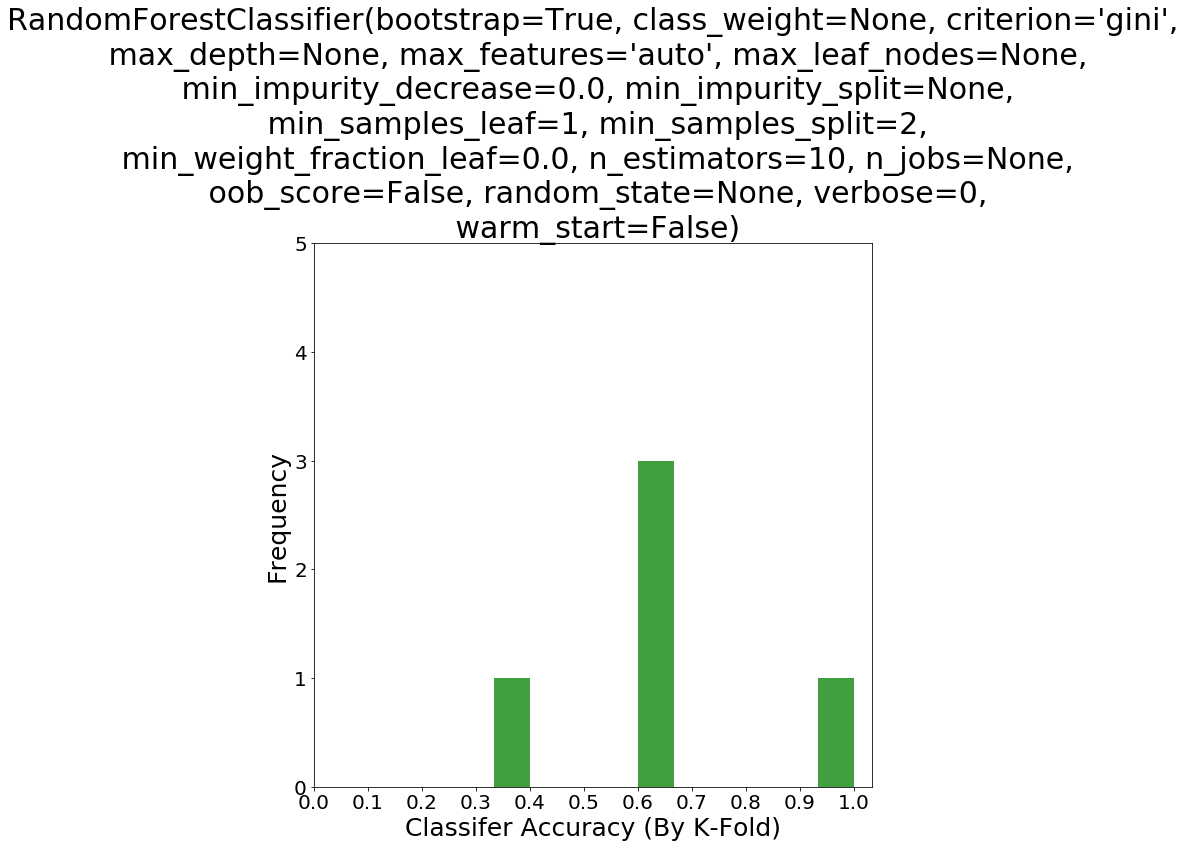

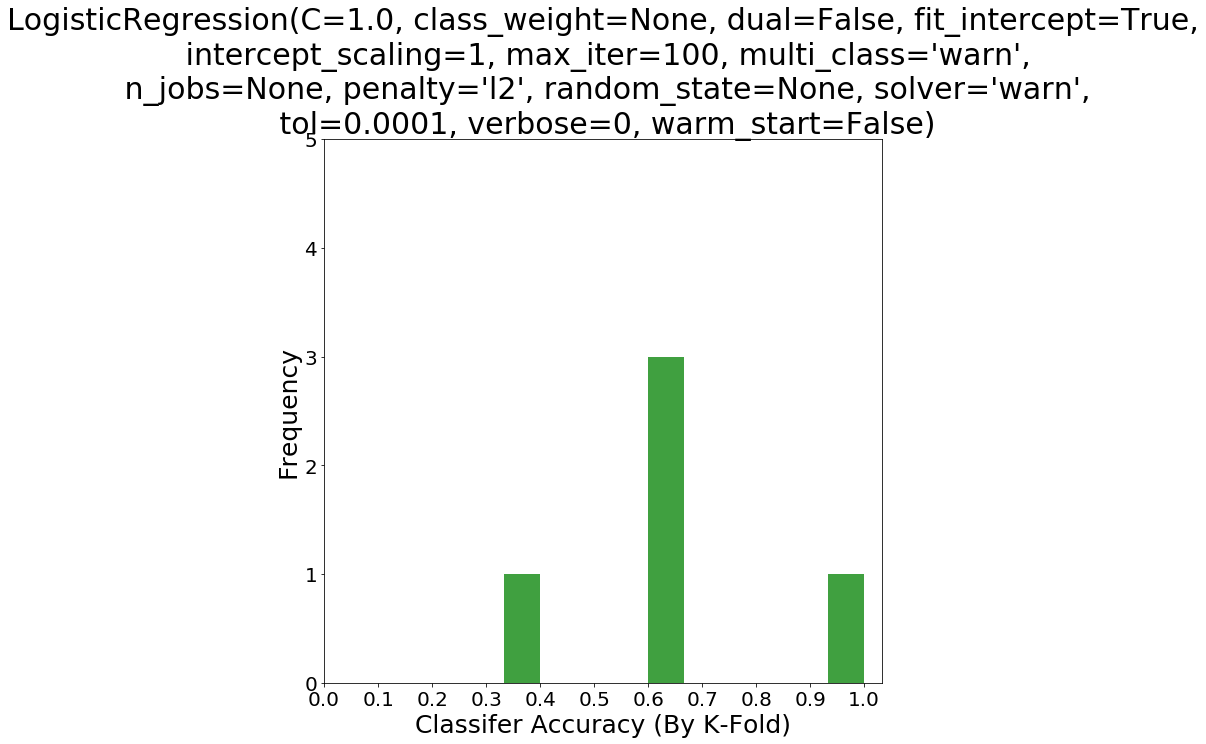

In [9]:
##############################EXAMPLE#################################
"""
Created on Sat Jan 12 10:50:56 2019

@author: Chris
"""

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #EDIT: I had to import KFold 
import matplotlib.pyplot as plt

# adapt this to run 

# Recommend to be done before live class 2
# 1. Write a function to take a list or dictionary of clfs and hypers ie use logistic regression, each with 3 different sets of hyper parrameters for each
 
# Recommend to be done before live class 3
# 2. expand to include larger number of classifiers and hyperparmater settings
# 3. find some simple data
# 4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings
 
# Recommend to be done before live class 4
# 5. Please set up your code to be run and save the results to the directory that its executed from
# 6. Investigate grid search function


#EDIT: array M includes the X's
M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])

#EDIT: array L includes the Y's, they're all ones and as such is only for example (an ML algorithm would always predict 1).
L = np.random.choice([0,1], size=(M.shape[0],), p=[1./3, 2./3])

#EDIT: a single value, 5, to use for 5-fold (k-fold) cross validation
n_folds = 5

#EDIT: pack the arrays together into "data"
data = (M,L,n_folds)

#EDIT: Let's see what we have.
print(data)


# data expanded
M, L, n_folds = data
kf = KFold(n_splits=n_folds)

print(kf)

#EDIT: Show what is kf.split doing
for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    print("k fold = ", ids)
    print("            train indexes", train_index)
    print("            test indexes", test_index)

#EDIT: A function, "run", to run all our classifiers against our data.


def run(a_clf, data, clf_hyper={}):
  M, L, n_folds = data #EDIT: unpack the "data" container of arrays
  kf = KFold(n_splits=n_folds) # JS: Establish the cross validation 
  ret = {} # JS: classic explicaiton of results
  
  for ids, (train_index, test_index) in enumerate(kf.split(M, L)): #EDIT: We're interating through train and test indexes by using kf.split
                                                                   #      from M and L.
                                                                   #      We're simply splitting rows into train and test rows
                                                                   #      for our five folds.
    
    clf = a_clf(**clf_hyper) # JS: unpack paramters into clf if they exist   #EDIT: this gives all keyword arguments except 
                                                                             #      for those corresponding to a formal parameter
                                                                             #      in a dictionary.
            
    clf.fit(M[train_index], L[train_index])   #EDIT: First param, M when subset by "train_index", 
                                              #      includes training X's. 
                                              #      Second param, L when subset by "train_index",
                                              #      includes training Y.                             
    
    pred = clf.predict(M[test_index])         #EDIT: Using M -our X's- subset by the test_indexes, 
                                              #      predict the Y's for the test rows.
    
    ret[ids]= {'clf': clf,                    #EDIT: Create arrays of
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}    
    
  return ret

#Use run function with a list and a for loop


clfsList = [RandomForestClassifier, LogisticRegression] 

clfsAccuracyDict = {}

for clfs in clfsList:
    
    results = run(clfs, data, clf_hyper={})
    
    
    for key in results:
        k1 = results[key]['clf'] 
        v1 = results[key]['accuracy']
        k1Test = str(k1) #Since we have a number of k-folds for each classifier...
                         #We want to prevent unique k1 values due to different "key" values
                         #when we actually have the same classifer and hyper parameter settings.
                         #So, we convert to a string
                        
        #String formatting            
        k1Test = k1Test.replace('            ',' ') # remove large spaces from string
        k1Test = k1Test.replace('          ',' ')
        
        #Then check if the string value 'k1Test' exists as a key in the dictionary
        if k1Test in clfsAccuracyDict:
            clfsAccuracyDict[k1Test].append(v1) #append the values to create an array (techically a list) of values
        else:
            clfsAccuracyDict[k1Test] = [v1] #create a new key (k1Test) in clfsAccuracyDict with a new value, (v1)
    

print(clfsAccuracyDict)

#then for each accuracy in the list... plot the values...

#k1, v1 = zip(*clfsAccuracyDict) # unpack a list of pairs into two tuples



# for determining maximum frequency (# of kfolds) for histogram y-axis
n = max(len(v1) for k1, v1 in clfsAccuracyDict.items())

#create the histograms
for k1, v1 in clfsAccuracyDict.items():
    # for each key in our clfsAccuracyDict, create a new histogram with a given key's values 
    fig = plt.figure(figsize =(10,10)) # This dictates the size of our histograms
    ax  = fig.add_subplot(1, 1, 1) # As the ax subplot numbers increase here, the plot gets smaller
    plt.hist(v1, facecolor='green', alpha=0.75) # create the histogram with the values
    ax.set_title(k1, fontsize=30) # increase title fontsize for readability
    ax.set_xlabel('Classifer Accuracy (By K-Fold)', fontsize=25) # increase x-axis label fontsize for readability
    ax.set_ylabel('Frequency', fontsize=25) # increase y-axis label fontsize for readability
    ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1)) # The accuracy can only be from 0 to 1 (e.g. 0 or 100%)
    ax.yaxis.set_ticks(np.arange(0, n+1, 1)) # n represents the number of k-folds
    ax.xaxis.set_tick_params(labelsize=20) # increase x-axis tick fontsize for readability
    ax.yaxis.set_tick_params(labelsize=20) # increase y-axis tick fontsize for readability
    #ax.grid(True) # you can turn this on for a grid, but I think it looks messy here.

plt.show()

__Create a list of classifier algorithms and a dictionary of thier parameters__

In [ ]:
#copied and adapted from Christopher Havenstein office hours presentation
listOfClassifiers = [RandomForestClassifier, LogisticRegression]
classifierParametersDictionary = {'RandomForestClassifier':{"min_samples_split": [2,3,4]},
                                  'LogisticRegression':{"tol":[0.001,0.01,0.1]}}

__Parse the dictionary of parameters__

In [ ]:
for outerKeys, outerValues in classifierParametersDictionary.items():
    innerKeys,innerValues = zip(*outerValues.items()) # explain zip (https://docs.python.org/3.3/library/functions.html#zip)
    for values in product(*innerValues): #for the values in the inner dictionary, get their unique combinations from product()
        parameterSet = dict(zip(innerKeys, values)) # create a dictionary from their values
        print(parameterSet)

*If dictionary has different number of parameters for different algorithms, put in error text so that the dictionary has same number of key values*  

*For this homework a boxplot may be ideal*  

__Create a function to run the classifiers with thier parameters__

Due before live class 4
5. Please set up your code to be run and save the results to the directory that its executed from
6. Investigate grid search function